<h1> Predicting the sine wave</h1>


<h2>Preparing the data</h2>

<p>(number of records) * (length of sequence) * (types of sequence)</p>
Here the (types of sequence) = 1 , because we have only one type of sequence - the sine wave

In [79]:
%pylab inline
import math

Populating the interactive namespace from numpy and matplotlib


In [80]:
sin_wave = np.array([math.sin(x) for x in np.arange(200)])

In [81]:
sin_wave[0:52]

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849,
       -0.54402111, -0.99999021, -0.53657292,  0.42016704,  0.99060736,
        0.65028784, -0.28790332, -0.96139749, -0.75098725,  0.14987721,
        0.91294525,  0.83665564, -0.00885131, -0.8462204 , -0.90557836,
       -0.13235175,  0.76255845,  0.95637593,  0.27090579, -0.66363388,
       -0.98803162, -0.40403765,  0.55142668,  0.99991186,  0.52908269,
       -0.42818267, -0.99177885, -0.64353813,  0.29636858,  0.96379539,
        0.74511316, -0.15862267, -0.91652155, -0.83177474,  0.01770193,
        0.85090352,  0.90178835,  0.12357312, -0.76825466, -0.95375265,
       -0.26237485,  0.67022918])

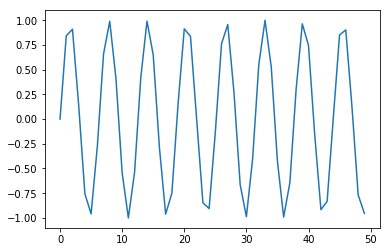

In [82]:
plt.plot(sin_wave[:50])

<p> Now we gonna create our data</p>

In [107]:
X , Y = [] , []

seq_len = 50
num_records = len(sin_wave) - seq_len

for i in range(num_records - 50):
    X.append(sin_wave[i:i+seq_len])
    Y.append(sin_wave[i+seq_len])

X = np.array(X)
X = np.expand_dims(X, axis = 2)

Y = np.array(Y)
Y = np.expand_dims(Y, axis = 1)

print(X.shape, " " , Y.shape)

(100, 50, 1)   (100, 1)


<p>We have looped for (num_records - 50) because we want to aside 50 records as our validation data.</p>

In [111]:
X_val, Y_val = [], []

for i in range(num_records -50, num_records):
    X_val.append(sin_wave[i:i+seq_len])
    Y_val.append(sin_wave[i+seq_len])

X_val = np.array(X_val)
X_val = np.expand_dims(X_val, axis = 2)

Y_val = np.array(y_val)
Y_val = np.expand_dims(Y_val, axis = 1)

print(X_val.shape, " ", Y_val.shape)

(50, 50, 1)   (50, 1, 1)


<h2>Declare the required variables</h2>

In [85]:
learning_rate = 0.0001
epochs = 25
T = 50  # Length of the sequence
hidden_dim = 100
output_dim = 1

bptt_truncate = 5
min_clip_value = -10
max_clip_value = 10


In [86]:
U = np.random.uniform(0, 1, (hidden_dim, T))
W = np.random.uniform(0, 1, (hidden_dim, hidden_dim))
V = np.random.uniform(0, 1, (output_dim, hidden_dim))

In [87]:
def sigmoid(x, deriv = False):
    if (deriv == False):
        return 1/ (1 + np.exp(-x))
    return 

<h2> Training the model</h2>
<ul>
 <strong>Check the loss on training data</strong>
        <li>Forward pass</li>
        <li>Calculate error</li>
<strong>Check the loss on validation data</strong>
        <li>Forward pass</li>
        <li>Calcualte the error</li>
<strong>Start actuall training</strong>
        <li>Backpropagate error</li>
        <li>Update the weights</li>
</ul>
    

<strong>Check the loss on the training data</strong>

In [126]:

for epoch in range(epochs):
    loss = 0.0
    
    # forward pass
    for i in range(Y.shape[0]):
        x, y = X[i], Y[i]
        prev_s = np.zeros((hidden_dim, 1))
        for t in range(T):
            new_input = np.zeros(x.shape)
            new_input[t] = x[t]
            mulu = np.dot(ih_weight, new_input)
            mulw = np.dot(hh_weight, prev_activation)
            add = multiply_i + multiply_h
            s = sigmoid(add)
            mulv = np.dot(s_weight, s)
            prev_s = s
            
        # calculate the error
        loss_per_record = (y - multiply_y) **2 /2
        
        loss += loss_per_record
    loss = loss / float(y.shape[0])
    
    # check loss on val
    val_loss = 0.0
    for i in range(Y_val.shape[0]):
        x, y = X_val[i], Y_val[i]
        prev_s = np.zeros((hidden_dim, 1))
        for t in range(T):
            new_input = np.zeros(x.shape)
            new_input[t]= x[t]
            mulu = np.dot(U, new_input)
            mulw = np.dot(W, prev_s)
            add = mulu + mulw
            s = sigmoid(add)
            mulv = np.dot(V, s)
            prev_s = s
        loss_per_record = (y-mulv)**2/2
        val_loss += loss_per_record
    val_loss = val_loss/ float(y.shape[0])
    print("Epoch: ", epoch + 1, " Loss: ", loss, " Val Loss: ",val_loss)
    
    # Actual training
    for i in range(Y.shape[0]):
        x, y = X[i], Y[i]
        
        layers = []
        
        prev_s = np.zeros((hidden_dim, 1))
        dU = np.zeros(U.shape)
        dV = np.zeros(V.shape)
        dW = np.zeros(W.shape)
        
        dU_t = np.zeros(U.shape)
        dV_t = np.zeros(V.shape)
        dW_t = np.zeros(W.shape)
        
        dU_i = np.zeros(U.shape)
        dW_i = np.zeros(W.shape)
        
        # forwaard pass
        for t in range(T):
            new_input = np.zeros(x.shape)
            new_input[t] = x[t]
            
            mulu = np.dot(U, new_input)
            mulw = np.dot(W, prev_s)
            add = mulu+ mulw
            s = sigmoid(add)
            mulv = np.dot(V, s)
            layers.append({'s':s, 'prev_s':prev_s})
            prev_s = s
            
         # backpropagation
        dmulv = (mulv - y) # derivative of prediction
            
        # back pass
        for t in range(T):
            dV_t = np.dot(dmulv, np.transpose(layers[t]['s']))
            dsv = np.dot(np.transpose(V), dmulv)
            
            ds = dsv
            dadd = add * (1 - add) * ds
            
            dmulw = dadd * np.ones_like(mulw)

            dprev_s = np.dot(np.transpose(W), dmulw)


            for i in range(t-1, max(-1, t-bptt_truncate-1), -1):
                ds = dsv + dprev_s
                dadd = add * (1 - add) * ds

                dmulw = dadd * np.ones_like(mulw)
                dmulu = dadd * np.ones_like(mulu)

                dW_i = np.dot(W, layers[t]['prev_s'])
                dprev_s = np.dot(np.transpose(W), dmulw)

                new_input = np.zeros(x.shape)
                new_input[t] = x[t]
                dU_i = np.dot(U, new_input)
                dx = np.dot(np.transpose(U), dmulu)

                dU_t += dU_i
                dW_t += dW_i
                
            dV += dV_t
            dU += dU_t
            dW += dW_t
            
            if dU.max() > max_clip_value:
                dU[dU > max_clip_value] = max_clip_value
            if dV.max() > max_clip_value:
                dV[dV > max_clip_value] = max_clip_value
            if dW.max() > max_clip_value:
                dW[dW > max_clip_value] = max_clip_value
            
            if dU.min() < min_clip_value:
                dU[dU < min_clip_value] = min_clip_value
            if dV.min() < min_clip_value:
                dV[dV < min_clip_value] = min_clip_value
            if dW.min() < min_clip_value:
                dW[dW < min_clip_value] = min_clip_value
        
        # update
        U -= learning_rate * dU
        V -= learning_rate * dV
        W -= learning_rate * dW            

Epoch:  1  Loss:  [[139506.97167063]]  Val Loss:  [[78128.3927953]]
Epoch:  2  Loss:  [[139506.97167063]]  Val Loss:  [[52679.15874711]]
Epoch:  3  Loss:  [[139506.97167063]]  Val Loss:  [[32229.92469778]]
Epoch:  4  Loss:  [[139506.97167063]]  Val Loss:  [[16780.67724201]]
Epoch:  5  Loss:  [[139506.97167063]]  Val Loss:  [[6265.21082227]]
Epoch:  6  Loss:  [[139506.97167063]]  Val Loss:  [[441.50947523]]
Epoch:  7  Loss:  [[139506.97167063]]  Val Loss:  [[8.69545528]]
Epoch:  8  Loss:  [[139506.97167063]]  Val Loss:  [[8.81823562]]
Epoch:  9  Loss:  [[139506.97167063]]  Val Loss:  [[8.8443856]]
Epoch:  10  Loss:  [[139506.97167063]]  Val Loss:  [[8.69283484]]
Epoch:  11  Loss:  [[139506.97167063]]  Val Loss:  [[8.7330432]]
Epoch:  12  Loss:  [[139506.97167063]]  Val Loss:  [[8.93442445]]
Epoch:  13  Loss:  [[139506.97167063]]  Val Loss:  [[8.79395268]]
Epoch:  14  Loss:  [[139506.97167063]]  Val Loss:  [[8.81016542]]
Epoch:  15  Loss:  [[139506.97167063]]  Val Loss:  [[8.73230947]]
E

<h2>Get prediction</h2>

In [129]:
preds = []
for i in range(Y.shape[0]):
    x, y = X[i], Y[i]
    
    prev_s = np.zeros((hidden_dim, 1))
    # Forward pass
    for t in range(T):
        mulu = np.dot(U, x)
        mulw = np.dot(W, prev_s)
        add = mulw + mulu
        s = sigmoid(add)
        mulv = np.dot(V, s)
        prev_s = s
    preds.append(mulv)
preds = np.array(preds)

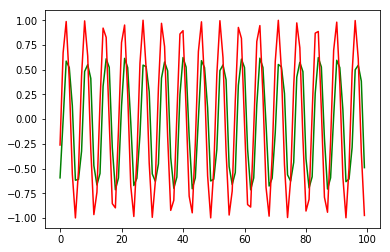

In [131]:
plt.plot(preds[:, 0,0], 'g')
plt.plot(Y[:,0], 'r')
plt.show()

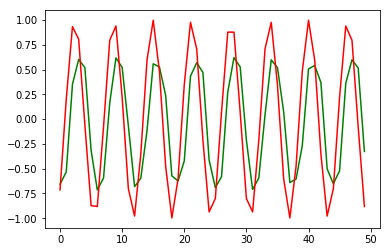

In [132]:
preds = []
for i in range(Y_val.shape[0]):
    x, y = X_val[i], Y_val[i]
    prev_s = np.zeros((hidden_dim, 1))
    # For each time step...
    for t in range(T):
        mulu = np.dot(U, x)
        mulw = np.dot(W, prev_s)
        add = mulw + mulu
        s = sigmoid(add)
        mulv = np.dot(V, s)
        prev_s = s

    preds.append(mulv)
    
preds = np.array(preds)

plt.plot(preds[:, 0, 0], 'g')
plt.plot(Y_val[:, 0], 'r')
plt.show()

In [137]:
from sklearn.metrics import mean_squared_error
max_val = 1
math.sqrt(mean_squared_error(Y_val[:, 0] * max_val, preds[:, 0, 0] * max_val))


0.49074145492806454